<h1> <p style="text-align: center;"> Определение закономерностей успешных игр </p> </h1>
<h3>Содержание</h3>
<div class="toc"><ol class="toc-item">
    <li> Изучение общей информации из файла и подготовка данных </li>
    <li> Исследовательский анализ данных </li>
    <li> Составление портрета пользователя каждого региона </li>
    <li> Проверка гипотез </li>
    <li> Общий вывод </li>
</ol></div>

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

## Изучение общей информации из файла и подготовка данных

Откроем файлы с данными и изучим общую информацию

In [2]:
games = pd.read_csv('') # в '' указываем наименование файла с данными
warnings.filterwarnings("ignore")

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим на названия столбцов и приведём их к нижнему регистру

In [4]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим данные на наличие явных дубликатов

In [6]:
games.duplicated().sum()

0

Рассмотрим более детально строки, где есть пропуски в названии и жанре, возможно, они нам не понадобятся в дальнейшем анализе и от таких строк можно просто избавиться.

In [7]:
games[pd.isna(games['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Те строки, где пропущено наименование, также нет жанра игры, но при этом есть годы выпуска и довольно существенные показатели по продажам в Северной Америке в строке 659, при этом оценки критиков и пользвателей, равно как и отнесение игры к возрастной категории отсутствуют. Если бы не высокие продажи в строке 659, наверное, можно было бы избавиться от этих строк, но ввиду высоких продаж, просто пока переименуем отсутсвующие значения на 'unknown' в колонках name и genre.

In [8]:
games[['name','genre']] = games[['name','genre']].fillna('unknown') 

Теперь рассмотрим отдельно строки, где продажи во всех регионах одновременно равны нулю, вероятно, они нам не пригодятся для дальнейшего анализа

In [9]:
games.query('na_sales==0 and eu_sales==0 and jp_sales==0 and other_sales==0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Таких строки всего две, в целом, можно от них избавиться, оценок критиков и пользователей у этих игр также нет, из относительно ценной информации только год выпуска, хотя сам по себе он никакой конкретной информации не несёт, только то, что в 2008 году были выпущены две игры, ни одной копии из которых продано не было.

In [10]:
games = games.query('na_sales!=0 or eu_sales!=0 or jp_sales!=0 or other_sales!=0')

Хотелось бы преобразовать данные в колонке year_of_release в тип дата-время, но, поскольку изначальные даты даны только в виде года, это не представляется возможным. В таком случае можем попробовать перевети формат данных в целые числа, а для этого нужно сначала обработать пропуски в этой колонке.
Попробуем посмотреть на наименования игр попропущенным годам.

In [11]:
games[pd.isna(games['year_of_release'])]['name'].value_counts().head(30)

LEGO Harry Potter: Years 5-7                                      7
Happy Feet Two                                                    4
Rock Band                                                         4
Test Drive Unlimited 2                                            3
Bejeweled 3                                                       3
WRC: FIA World Rally Championship                                 3
Singularity                                                       2
NBA Live 2003                                                     2
Silent Hill: Homecoming                                           2
Rock Revolution                                                   2
Robert Ludlum's The Bourne Conspiracy                             2
The Chronicles of Narnia: The Lion, The Witch and The Wardrobe    2
Backbreaker                                                       2
The Lord of the Rings: War in the North                           2
Virtua Quest                                    

Теперь проверим встречаются ли какие-либо из этих наименований в тех строках, где заполнены данные по году

In [12]:
games.query('name=="LEGO Harry Potter: Years 5-7" or name=="Happy Feet Two" or name=="Rock Band" or name=="Test Drive Unlimited 2" or name=="Bejeweled 3" or name=="WRC: FIA World Rally Championship" or name =="PDC World Championship Darts 2008" or name=="NBA Live 2003" or name=="All-Star Baseball 2005" or name =="Drake of the 99 Dragons"')[['name','year_of_release']].value_counts()

name                               year_of_release
Bejeweled 3                        2010.0             1
Happy Feet Two                     2011.0             1
LEGO Harry Potter: Years 5-7       2012.0             1
NBA Live 2003                      2002.0             1
PDC World Championship Darts 2008  2008.0             1
WRC: FIA World Rally Championship  2005.0             1
dtype: int64

Таким образом, можем заполнить часть пропусков в years_of_release

In [13]:
def year (row):
    name = row['name']
    if name == 'Bejeweled 3':
        return 2010
    elif name == 'Happy Feet Two':
        return 2011
    elif name == 'LEGO Harry Potter: Years 5-7':
        return 2012
    elif name =='NBA Live 2003':
        return 2002
    elif name == 'PDC World Championship Darts 2008':
        return 2008
    elif name == 'WRC: FIA World Rally Championship':
        return 2005
games['year_of_release'] = games['year_of_release'].fillna(games.apply(year,axis=1))

In [14]:
games.query('name=="LEGO Harry Potter: Years 5-7" or name=="Happy Feet Two" or name=="Rock Band" or name=="Test Drive Unlimited 2" or name=="Bejeweled 3" or name=="WRC: FIA World Rally Championship" or name =="PDC World Championship Darts 2008" or name=="NBA Live 2003" or name=="All-Star Baseball 2005" or name =="Drake of the 99 Dragons"')[['name','year_of_release']].value_counts()

name                               year_of_release
LEGO Harry Potter: Years 5-7       2012.0             8
Happy Feet Two                     2011.0             5
Bejeweled 3                        2010.0             4
WRC: FIA World Rally Championship  2005.0             4
NBA Live 2003                      2002.0             3
PDC World Championship Darts 2008  2008.0             3
dtype: int64

Оставшиеся пропуски по годам попробуем заполнить годом, который при дальнейших расчётах сможем отбраcывать в графиках , как выброс, пусть это будет 1900.
Также ппривёдём данные в колонке year_of_release в целочисленный формат, для сокращения объёмов памяти при выполнении дальнейших операций

In [15]:
games['year_of_release'].min()

1980.0

In [16]:
games['year_of_release'] = games['year_of_release'].fillna(1900)
games['year_of_release'] = games['year_of_release'].astype(int)

Далее нужно заполнить пропуски в колонках critic_score, user_score, чтобы получить возможность привести данные в этих колонках к целочисленному формату. Поскольку заполнить эти данные каким-либо эмпирическим методом не представляется возможным, заменим пропуски на заведомо некорректные значения, чтобы прочие данные могли участвовать в дальнейшем анализе, а данные по пропускам мы могли сразу распознавать как "выбросы". Например, мы знаем что оценка критиков не может превышать 100 баллов, значит наши пропуски в данной колонке заменим на 1000 баллов, а оценка пользователей - не должна превышать 10 баллов, значит можем обозначить пропуски, как 100 баллов. Также в колонке user_score есть строковые значения tbd (=to be determined), это означает, что игре пользователи пока не поставили никакую оценку, будем считать, что это нулевая оценка в таком случае.
Далее приведём данные в обеих колонках к целочисленному формату. 

In [17]:
games['critic_score'] = games['critic_score'].fillna(1000)
games['user_score'] = games['user_score'].fillna(100)
games['user_score'] = games['user_score'].replace('tbd', 0)
games['user_score'] = pd.to_numeric(games['user_score'])
games[['critic_score','user_score']] = games[['critic_score','user_score']].astype(int)

Теперь приступим к обработке пропусков в колонке rating. Для начала посмотрим, какие значения есть в этой колонке, оценим количество каждого из этих значений

In [18]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Тут обнаруживаем первые неявные дубликаты - значения E("Everyone")и K-A("Kids to Adults") по сути - одно и то же, просто до 1998 года использовалось обозначения K-A, а после его заменили на E. Также M("Mature") и AO ("Adults Only 18+") тоже примерно одно и то же.
Таким образом, заменим значения K-A на E, M на  АО, а отсутствующие значения заменим на "unknown". С одной стороны отсутствующие значения можно было бы заменить и на RP («Rating Pending»), но такое возможно, скорее всего, только для относительно новых игр, а у нас пропуски есть и в более "старые" периоды.

In [19]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('M', 'AO')
games['rating'] = games['rating'].fillna('unknown')

Предполагаю, что причины имеющихся пропусков в оценках пользователей связаны с тем, что далеко не все пользователи вообще оценивают игры, приложения и т.п., многим просто лень. Что касается, оценки критиков, то, вероятно, у не самых популярных игр таких оценок также может и не быть. К сожалению, причины пропусков в годе выпуска игры и присвоении игре определённой возрастной категории вряд ли можно отнести к закономерным, скорее всего, это абсолютно случайные причины.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.7+ MB


In [21]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16713.0,2004.907736,14.134712,1900.00,2003.00,2007.00,2010.00,2016.00
na_sales,16713.0,0.263409,0.813647,0.00,0.00,0.08,0.24,41.36
eu_sales,16713.0,0.145077,0.503366,0.00,0.00,0.02,0.11,28.96
jp_sales,16713.0,0.077626,0.308871,0.00,0.00,0.00,0.04,10.22
other_sales,16713.0,0.047348,0.186741,0.00,0.00,0.01,0.03,10.57
critic_score,16713.0,546.711542,465.471069,13.00,71.00,1000.00,1000.00,1000.00
user_score,16713.0,43.115599,46.591130,0.00,6.00,8.00,100.00,100.00
total_sales,16713.0,0.533460,1.548343,0.01,0.06,0.17,0.47,82.54


Данные обработаны, можно приступать к дальнейшему анализу.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. В данном случае можем сразу отсечь годы меньше 1980 и более 2020. В исходных данных, как мы помним, данных за годы ранее 1980 и позднее 2016, в принципе не было.

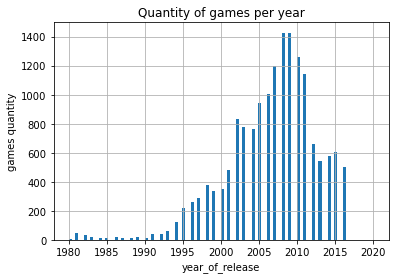

In [22]:
games['year_of_release'].hist(bins = 100, range=(1980,2020)) 
plt.title('Quantity of games per year')
plt.xlabel('year_of_release')
plt.ylabel('games quantity')
plt.show()

Из гистограммы видим, что больше всего игр было выпущено в 2008 и 2009 годах, меньше всего игр было выпущено в период с 1980 по 1993 годы, полагаю, как раз этот период с минимальным количеством игр можно считать относительно неважным, так как в этот период развитие ИТ не достигло таких высот, как сейчас,поэтому эти данные для оценки и анализа будущих продаж будут уже не актуальны.

Посмотрим, как менялись продажи по платформам в целом, а также по платформам в привязке к году выпуска игры.

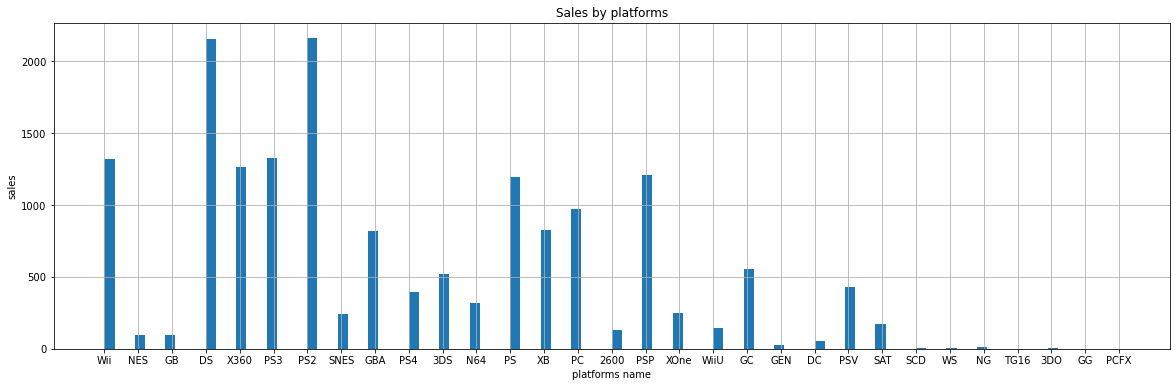

In [23]:
games['platform'].hist(bins = 100, figsize=(20,6))
plt.title('Sales by platforms')
plt.xlabel('platforms name')
plt.ylabel('sales')
plt.show()

In [24]:
games.query('year_of_release != 1900').pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False).head(30)

total_sales
platform year_of_release             
PS2      2004                  211.81
Wii      2009                  206.97
PS2      2002                  205.38
         2003                  184.31
Wii      2008                  171.32
X360     2010                  170.17
PS       1998                  169.49
PS2      2001                  166.43
         2005                  160.66
PS3      2011                  156.88
Wii      2007                  152.77
DS       2007                  146.94
         2008                  145.32
PS       1999                  144.53
X360     2011                  143.94
PS3      2010                  142.32
Wii      2006                  137.15
PS       1997                  136.17
X360     2008                  135.26
PS3      2009                  130.93
DS       2005                  130.14
Wii      2010                  127.95
X360     2009                  120.29
DS       2006                  119.81
         2009                  119.54
PS4      2015                  118.90
PS3      2008                  118.52
         2013                  113.25
         2012                  108.28
PS2      2006                  103.42

Выбираем платформы с наибольшими суммарными продажами, это платформы PS2, Wii, X360, PS, PS3, DS.
Построим распределение по годам, определим, за какой характерный срок появляются новые и исчезают старые платформы.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

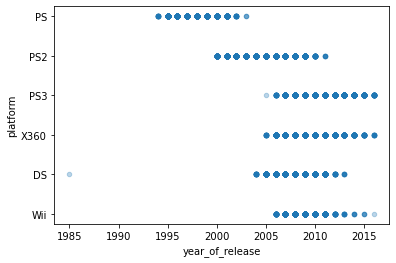

In [25]:
popular_platforms = games.query('platform == "PS2" or platform == "Wii" or platform =="X360" or platform == "PS" or platform =="PS3" or platform == "X360" or platform == "DS"')
popular_platforms.query('year_of_release != 1900').plot(x='year_of_release', y='platform', kind='scatter', alpha=0.3)

Как мы видим, характерный срок "жизни" платформы не более 7-8 лет, на пик роста платформы приходится не более 2-3 лет. Наиболее популярные на данный момент платформы - PS3 и X360, игровая платформа Wii всё ещё популярна, но её популярность уже начинает снижаться.

Возьмём данные за период с 2013 по неполный 2016 годы, чтобы постороить прогноз на 2017 год. Определим, какие платформы лидируют по продажам, растут или падают, Выберем несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

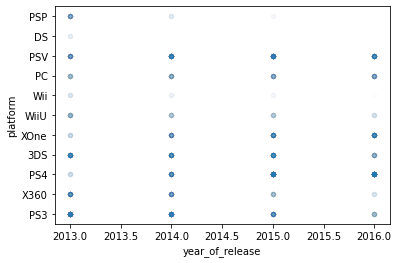

In [26]:
actual_period = games.query('2013 <= year_of_release <= 2016')
actual_period.plot(x='year_of_release', y='platform', kind='scatter', alpha=0.01)

Судя по графику, в лидерах по продажам в общем за период с 2014 по неполный 2016 годы платформы PSV и 3DS. При этом, наблюдается рост продаж на платформах XOne, PS4. Продажи падают на платформах WiiU, 3DS, X360, PS3, а на платформах DS, Wii продажи либо отсутствуют совсем, либо очень невелики. К потенциально прибыльным платформам к 2017 году можно отнести те, которые увеличивают свои продажи к 2015-2016гг. и у которых только недавно начался жизненный цикл, это платформы XOne, PS4, также можно не списывать со счетов платформу PSV, 3DS (там пока стабильно высокие показатели) и подробнее взглянуть на платформу PC (тут пока нет тенденции к снижению, возможно пик роста ещё впереди).

Построим график «ящик с усами» по глобальным продажам игр в разбивке по выбранным платформам.

(0.0, 1.0)

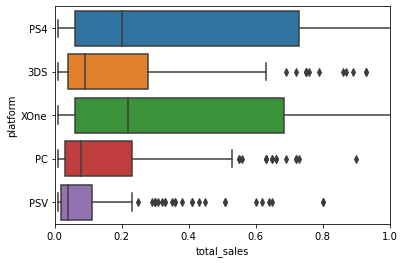

In [27]:
platform_sales_selected = actual_period.query('platform =="XOne" or platform =="PS4" or platform =="PSV" or platform == "3DS" or platform =="PC"')
sns.boxplot(x=platform_sales_selected['total_sales'], y=platform_sales_selected['platform'])
plt.xlim(0, 1)

In [28]:
platform_sales_selected.pivot_table(index=['platform','year_of_release'],values='total_sales', aggfunc='sum')


total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Итак, мы видим, что разбросы по глобальным продажам на выбранных платформах различны. Наибольший разброс по продажам на платформах PS4 и XOne - от 0,1 до 0,7 млн копий примерно, а на платформе PSV - от 0 до 0,1 млн. копий.
При этом медианные значения глобальных продаж на каждой из выбранных платформ, стремятся в меньшую сторону, это говорит о том, что в целом распределение данных смещено вправо, а средние значения продаж меньше медианных. Также на графике мы видим довольно большое количество выбросов с правой стороны по всем выбранным платформам.

С помощью сводной таблицы также посмотрели статистику глобальных продаж за посление годы по выбранным платформам, видим рост продаж на платформах PS4 и XOne (2016 год не учитываем, так как данные по нему неполные), к сожалению, продажи на платформах 3DS, PC и PSV показывали рост только до 2014 года включительно, в 2015 году почему-то снизились.

Посмотрим, как влияют на продажи внутри одной популярной платформы XOne отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

In [29]:
def critic_scores_influence(data, plt_name, title):
    critic = data[(data['critic_score']!=1000) & (data['platform'] == plt_name)]
    critic.plot(x='total_sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title=title)
    print('Коэффициент корреляции продаж от оценки критиков:', critic['total_sales'].corr(critic['critic_score']))
    return critic

def user_scores_influence(data, plt_name,title):
    user = data[(data['user_score']!=100) & (data['platform'] == plt_name)]
    user.plot(x='total_sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title=title)
    print('Коэффициент корреляции продаж от оценки пользователей:',user['total_sales'].corr(user['user_score']))
    return user


In [30]:
def scores_influence(data, plt_name, title_1, title_2):
    critic = data[(data['critic_score']!=1000) & (data['platform'] == plt_name)]
    critic.plot(x='total_sales', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title=title_1)
    print('Коэффициент корреляции продаж от оценки критиков:', critic['total_sales'].corr(critic['critic_score']))
    user = data[(data['user_score']!=100) & (data['platform'] == plt_name)]
    user.plot(x='total_sales', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title=title_2)
    plt.title('XOne/user_score')
    print('Коэффициент корреляции продаж от оценки пользователей:',user['total_sales'].corr(user['user_score']))
    return critic, user

Коэффициент корреляции продаж от оценки критиков: 0.41699832800840175
Коэффициент корреляции продаж от оценки пользователей: 0.06108091226155909


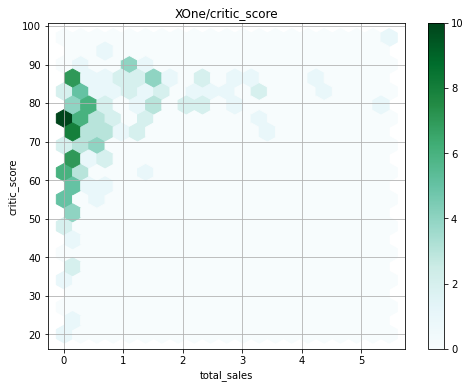

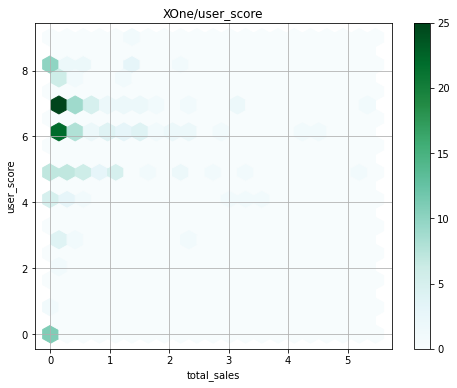

In [31]:
xone_scores = scores_influence(data = actual_period, plt_name = 'XOne', title_1 = 'XOne/critic_score', title_2 = 'XOne/user_score')

Видим, что между оценками критиков/пользователей и глобальными продажами на платформе XOne есть прямопропорциональные связи, т.е. с ростом оценки критиков/ пользователей, могут расти продажи, однако эти связи довольно слабые (особенно с между продажами и оценкой пользователей).

Посмотрим, как обстоят дела со взаимосвязью оценок и продажами на платформе WiiU.

Коэффициент корреляции продаж от оценки критиков: 0.406567902061781
Коэффициент корреляции продаж от оценки пользователей: 0.023874818051222615


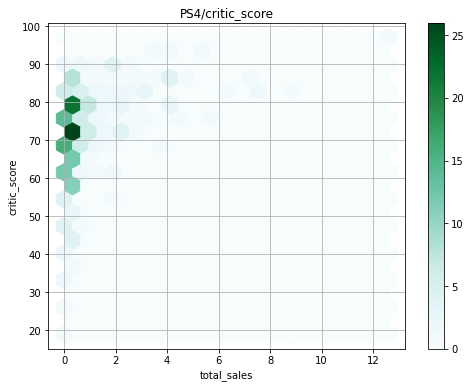

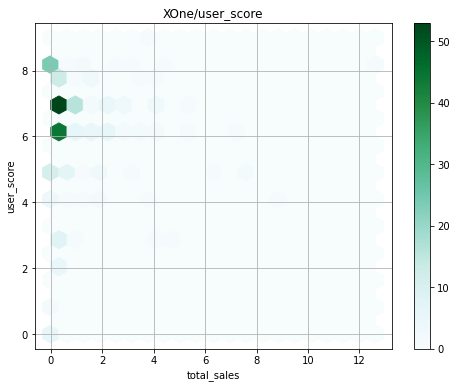

In [32]:
ps4_scores = scores_influence(data = actual_period, plt_name = 'PS4', title_1 = 'PS4/critic_score', title_2 = 'PS4/user_score')

На платформе PS4 также наблюдается прямопропорциональная связь между оценками критиков, оценками пользователей и глобальными продажами, тут уровень связей  примерно такой же, как и в случае с платформой XOne.

Попробуем проверить взаимосвязи между оценками пользователей/критиков и глобальными продажами на одной из платформ-лидеров периода 2013-2015 годов, например,  платформа PSV.

Коэффициент корреляции продаж от оценки критиков: 0.25474235030686565
Коэффициент корреляции продаж от оценки пользователей: 0.14548901235736278


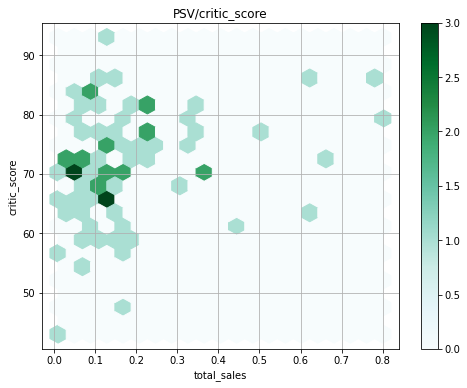

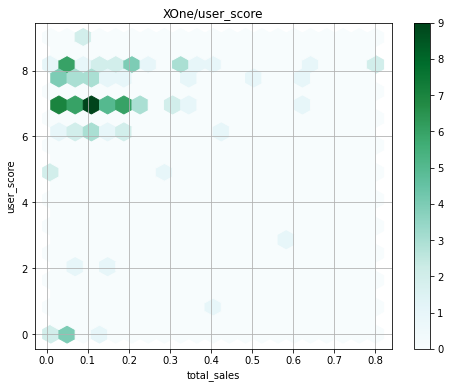

In [33]:
psv_scores = scores_influence(data = actual_period, plt_name = 'PSV', title_1 = 'PSV/critic_score', title_2 = 'PSV/user_score')

Тут аналогичный вывод - связь между оценками и продажами прямопропорциональная, но слаба, ещё и оценка критиков влияет на продажи в меньшей степени, чем на платформах XOne и PS4.

Тут предполагаем, что корреляция продаж с отзывами критиков выше, чем с отзывами пользователей, по той причине, что отзывы критиков, как правило, имеют информативный характер и появляются до выпуска игры, чтобы ознакомить пользователей с тем, что будет такая-то игра в таком-то жанре с таким-то сюжетом, а рейтинги пользователей складываются уже на основе того, что сами пользователи в эту игру играли, т.е. отзыв (в т.ч. негативный) может быть написан уже после покупки, т.е. пользователю игра не понравилась, но он уже её купил.

Корреляция Пирсона может выявить линейный тип связи между двумя переменными. Если подходить к вопросу с точки зрения теории, то значение кореляции, равное 0, означает, что линейной зависимости между переменными нет, но на самом деле, нельзя утверждать об отсутствии какой-либо связи даже при близких к нулю показателях корреляции, особенно в нашем случае, так как помимо оценок есть ещё комплекс дополняющих факторов,которые влияют на продажи. Возможно отдельно оценки на продажи влияют несущественно, но в комплексе с другими показателями (например популярность жанра, страна релиза) эти оценки будут оказывать бОльшее влияние на продажи, так как интерпретация коэффициента корреляции всегда зависит от контекста и целей. 

Утверждать о причинно-следственной связи между оценками и продажами, даже при высоком уровне корреляции, чисто теоретически можно, но тут опять же есть другие факторы, влияющие на продажи, мне кажется, что можно утверждать только о причинно-следственных связях между комплексом факторов и продажами.    

Посмотрим на общее распределение игр по жанрам, сразу составим функцию для оценки трёх вариантов популярностей:
- за общий период
- за актуальный период (2013- неполный 2016 годы)
- только за неполный 2016 год

In [34]:
def genre_popularity(data, title):
    data['genre'].hist(bins = 30, figsize = (15,6))
    plt.title(title)
    display('Наиболее прибыльные жанры по суммарным продажам', data.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head())
    display('Наименее прибыльные жанры по суммарным продажам', data.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales').head())
    display('Наиболее прибыльные жанры по средней цене игры', data.pivot_table(index='genre', values='total_sales').reset_index().sort_values(by='total_sales', ascending=False).head())
    display('Наименее прибыльные жанры по средней цене игры', data.pivot_table(index='genre', values='total_sales').reset_index().sort_values(by='total_sales').head())
    
    return data['genre'].hist(bins = 30, figsize = (15,6))

'Наиболее прибыльные жанры по суммарным продажам'

,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77


'Наименее прибыльные жанры по суммарным продажам'

,genre,total_sales
12,unknown,2.42
11,Strategy,174.23
1,Adventure,237.59
5,Puzzle,242.57
9,Simulation,389.97


'Наиболее прибыльные жанры по средней цене игры'

,genre,total_sales
12,unknown,1.210000
4,Platform,0.932173
8,Shooter,0.795503
7,Role-Playing,0.623872
6,Racing,0.583870


'Наименее прибыльные жанры по средней цене игры'

,genre,total_sales
1,Adventure,0.182341
11,Strategy,0.255095
5,Puzzle,0.418224
9,Simulation,0.446701
3,Misc,0.458577


<AxesSubplot:title={'center':'Гистограмма популярности жанров за всю историю до 2016 года'}>

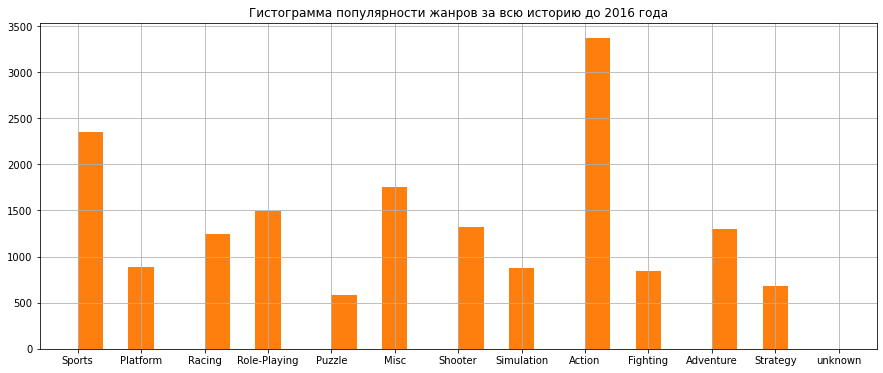

In [35]:
genre_popularity(data=games, title='Гистограмма популярности жанров за всю историю до 2016 года')

Итак, больше всего игр выпущено в жанрах Action и Sports, меньше всего - Strategy и Puzzle. 
Cамые прибыльные жанры по суммарным продажам за весь период - Action и Sports, наименее прибыльные - неизвестного нам жанра и жанра Strategy. При этом наиболее прибыльные жанры по средней цене игры - игры неизвестного нам жанра(эти игры были в топ-5 наименее прибыльных суммарных продаж) и жанра Platform, а наименее прибыльные жанры по средней цене игры - жанры Adventure и Strategy.

Посмотрим, актуальна ли эта информация для нашего периода с 2005 по 2015 годы.

'Наиболее прибыльные жанры по суммарным продажам'

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82


'Наименее прибыльные жанры по суммарным продажам'

,genre,total_sales
5,Puzzle,3.17
11,Strategy,10.08
9,Simulation,21.76
1,Adventure,23.64
2,Fighting,35.31


'Наиболее прибыльные жанры по средней цене игры'

,genre,total_sales
8,Shooter,1.245882
10,Sports,0.703972
4,Platform,0.576081
7,Role-Playing,0.499623
6,Racing,0.469294


'Наименее прибыльные жанры по средней цене игры'

,genre,total_sales
1,Adventure,0.096490
11,Strategy,0.180000
5,Puzzle,0.186471
9,Simulation,0.350968
3,Misc,0.405290


<AxesSubplot:title={'center':'Гистограмма популярности жанров за 2013-неполный 2016 годы'}>

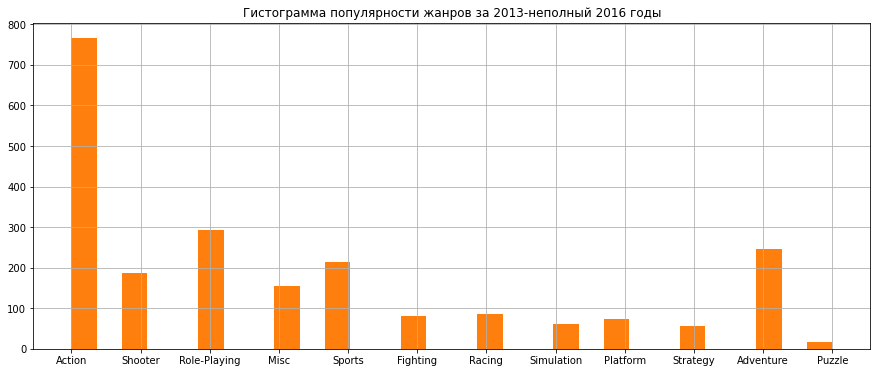

In [36]:
genre_popularity(data=actual_period, title='Гистограмма популярности жанров за 2013-неполный 2016 годы')

'Наиболее прибыльные жанры по суммарным продажам'

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82


'Наименее прибыльные жанры по суммарным продажам'

,genre,total_sales
5,Puzzle,3.17
11,Strategy,10.08
9,Simulation,21.76
1,Adventure,23.64
2,Fighting,35.31


'Наиболее прибыльные жанры по средней цене игры'

,genre,total_sales
8,Shooter,1.245882
10,Sports,0.703972
4,Platform,0.576081
7,Role-Playing,0.499623
6,Racing,0.469294


'Наименее прибыльные жанры по средней цене игры'

,genre,total_sales
1,Adventure,0.096490
11,Strategy,0.180000
5,Puzzle,0.186471
9,Simulation,0.350968
3,Misc,0.405290


<AxesSubplot:title={'center':'Гистограмма популярности жанров за 2013-неполный 2016 годы'}>

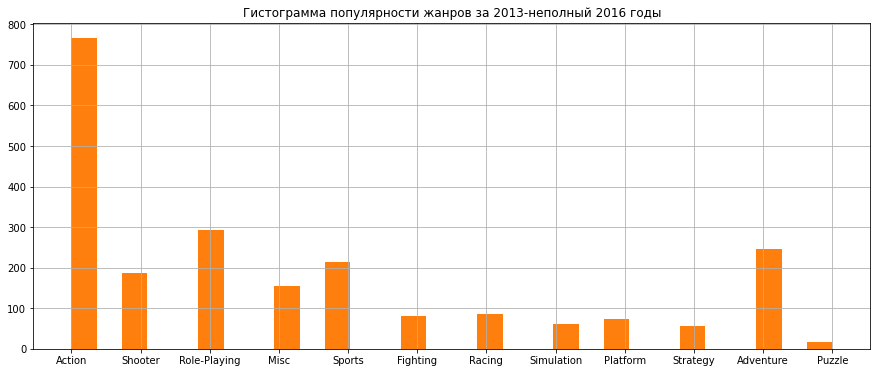

In [37]:
genre_popularity(data=actual_period, title='Гистограмма популярности жанров за 2013-неполный 2016 годы')

В целом, информация актуальна и для периода с 2013 по неполный 2015 годы, однако жанр Sports довольно сильно утрачивает свои позиции и становится вровень с жанром Role-Playing по поулярности. В лидерах продаж остаётся жанр Action, минимальные продажи у игр жанра Puzzle. По средней цене игры в самых популярных жанрах Shooter, а жанр Action даже не вошёл в топ-5 по прибыльности по средней цене, наименее прибыльный жанр по средней цене - Adventure. 

Посмотрим ситуацию по поулярности игр только на 2016 год.

'Наиболее прибыльные жанры по суммарным продажам'

,genre,total_sales
8,Shooter,38.22
0,Action,30.11
10,Sports,23.49
7,Role-Playing,18.18
2,Fighting,4.47


'Наименее прибыльные жанры по суммарным продажам'

,genre,total_sales
5,Puzzle,0.01
11,Strategy,1.13
9,Simulation,1.89
3,Misc,2.60
6,Racing,2.79


'Наиболее прибыльные жанры по средней цене игры'

,genre,total_sales
8,Shooter,0.813191
10,Sports,0.489375
7,Role-Playing,0.336667
2,Fighting,0.279375
4,Platform,0.215333


'Наименее прибыльные жанры по средней цене игры'

,genre,total_sales
5,Puzzle,0.010000
1,Adventure,0.068214
3,Misc,0.081250
11,Strategy,0.086923
9,Simulation,0.105000


<AxesSubplot:title={'center':'Гистограмма популярности жанров только за 2016 год'}>

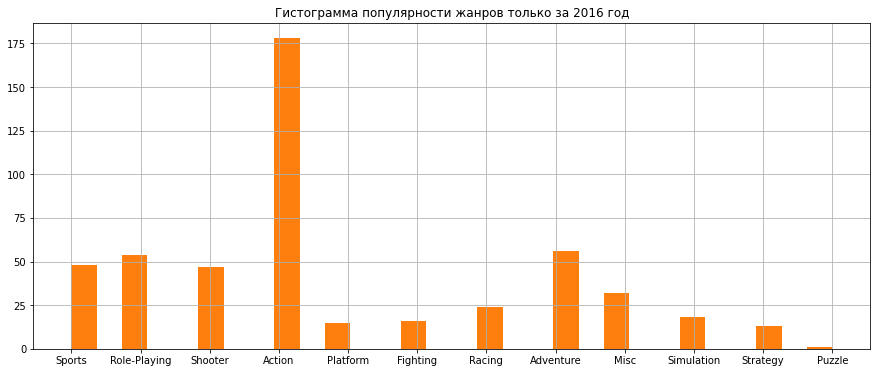

In [38]:
genre_popularity(data=games.query('year_of_release==2016'), title='Гистограмма популярности жанров только за 2016 год')

На неполный 2016 год пока в абсолютных лидерах жанрах по количеству выпущенных игр - жанр Action, однако по суммарным продажам и по средней цене лидирует жанр Shooter, жанр Action - на втором месте по суммарным продажам и его нет в топ-5 по средней цене, минимальные суммарные продажи и наименьшая средняя цена у жанра Puzzle.

## Составление портрета пользователя каждого региона



Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5), опишем различия в долях продаж
- самые популярные жанры (топ-5)
- оценим, влияет ли рейтинг ESRB на продажи в отдельном регионе

Сначала дополним наш датафрейм колонкой с расшифровкой рейтингов ESRB для наглядности.

def rating_description(row):
    rating = row['rating']
    if rating == 'EC':
        return 'Early childhood'
    elif rating == 'E':
        return 'Everyone'
    elif rating == 'E10+':
        return 'Everyone 10 and older'
    elif rating == 'T':
        return 'Teen'
    elif rating == 'M':
        return 'Mature'
    elif rating == 'AO':
        return 'Adults Only 18+'
    elif rating == 'RP':
        return 'Rating Pending'
    else:
        return rating

actual_period['rating_description'] = actual_period.apply(rating_description, axis=1)

In [39]:
ESRB_dict = {'E': 'Everyone', 'T': 'Teen', 'EC': 'Early childhood', 'E10+': 'Everyone 10 and older', 'AO': 'Adults Only 18+','RP': 'Rating Pending'}
actual_period['rating_description'] = actual_period['rating'].map(ESRB_dict)

Напишем функцию для состалвения портрета пользователя по региону.

In [40]:
def portrait(data, value):
    platform = data.pivot_table(index='platform', values=value, aggfunc='sum').reset_index()
    platform['sales_part'] = platform[value]/(platform[value].sum())
    platform = platform.sort_values(by='sales_part', ascending=False).head().T
    genre = data.pivot_table(index='genre', values=value, aggfunc='sum').reset_index().sort_values(by=value, ascending=False).head()
    genre['sales_part'] = genre[value]/(genre[value].sum())
    rating = data.pivot_table(index='rating_description', values=value,aggfunc='sum')
    rating['sales_part'] = rating[value]/rating[value].sum()
    rating = rating.sort_values(by=value, ascending=False)
    rating.query('sales_part > 0.01').plot(y=value, kind='pie', figsize=(15,7))
    display(platform, genre, rating)
    return platform, genre, rating

Составим портрет североамериканского пользователя

,4,10,9,3,0
platform,PS4,XOne,X360,PS3,3DS
na_sales,108.74,93.12,81.66,63.5,38.2
sales_part,0.248429,0.212744,0.186562,0.145073,0.087272


,genre,na_sales,sales_part
0,Action,126.05,0.336178
8,Shooter,109.74,0.292679
10,Sports,65.27,0.174077
7,Role-Playing,46.40,0.123750
3,Misc,27.49,0.073316


,na_sales,sales_part
rating_description,,
Adults Only 18+,165.21,0.474346
Everyone,79.05,0.226966
Everyone 10 and older,54.24,0.155732
Teen,49.79,0.142956


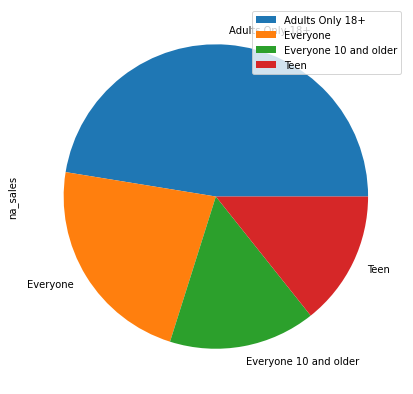

In [41]:
na_portrait = portrait(data = actual_period, value = 'na_sales')

В Северной Америке наиболее популярными по продажам платформами являются PS4 (24,8% от общего количества продаж в регионе), XOne (21,3%), X360 (18,7%), PS3 (14,5%), 3DS (8,7%).

Наиболее популярными играми в Северной Америке являются игры в жанрах Action (126,05 млн. проданных копий за период с 2013 по неполный 2016 годы, т.е. 33,6%), Shooter (109,74 млн. проданных копий = 29,3%), Sports (65,27 млн. проданных копии = 17,4%), Role-Playing (46,4 млн. проданных копии = 12,4%), Misc (27,49 млн. проданных копии = 7,3%).

Наиболее популярными играми в Северной Америке являются игры для взрослых (47,4% от всех проданных копий в регионе за 2013-16гг), наименее популярными в Северной Америке являются игры категории 10+ и игры для подростков (15,6% и 14,3% соответственно).

Теперь составим портрет среднестатистического европейского пользователя 2013-15 гг.

,4,3,10,9,0
platform,PS4,PS3,XOne,X360,3DS
eu_sales,141.09,67.81,51.59,42.52,30.96
sales_part,0.359712,0.172883,0.13153,0.108406,0.078933


,genre,eu_sales,sales_part
0,Action,118.13,0.364970
8,Shooter,87.86,0.271449
10,Sports,60.52,0.186981
7,Role-Playing,36.97,0.114221
6,Racing,20.19,0.062378


,eu_sales,sales_part
rating_description,,
Adults Only 18+,145.32,0.463807
Everyone,83.36,0.266054
Everyone 10 and older,42.69,0.136250
Teen,41.95,0.133889


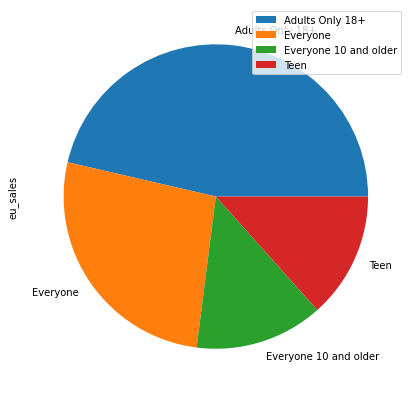

In [42]:
eu_portrat  = portrait(data = actual_period, value='eu_sales')

В Европе наиболее популярными по продажам платформами являются PS4 (35,97% от общего количества продаж в регионе), PS3 (17,3%), XOne (13,2%), X360 (10,8%), 3DS (7,9%).

Наиболее популярными играми в Европе являются игры в жанрах Action (118,13 млн. проданных копий за период с 2013 по 2016 годы, т.е. 36,5% от всех игр в данном регионе), Shooter (87,86 млн. проданных копии = 27,1%), Sports (60,52 млн. проданных копий = 18,7%),  Role-Playing (36,97 млн. проданных копии = 11,4%), Raсing (20,19 млн. проданных копии = 6,2%).

Наиболее популярными играми в Европе являются игры для взрослых (46,4% от всех проданных копий в регионе за 2013-16гг), наименее популярными в Европе являются игры категории 10+ и игры для подростков (13,6% и 13,4% соответственно).

Теперь составим портрет среднестатистического японского пользователя 2013-16 гг.

,0,3,6,4,8
platform,3DS,PS3,PSV,PS4,WiiU
jp_sales,67.81,23.35,18.59,15.96,10.88
sales_part,0.481674,0.165862,0.13205,0.113368,0.077284


,genre,jp_sales,sales_part
7,Role-Playing,51.04,0.443865
0,Action,40.49,0.352118
3,Misc,9.20,0.080007
2,Fighting,7.65,0.066528
8,Shooter,6.61,0.057483


,jp_sales,sales_part
rating_description,,
Teen,20.59,0.369460
Everyone,15.14,0.271667
Adults Only 18+,14.11,0.253185
Everyone 10 and older,5.89,0.105688


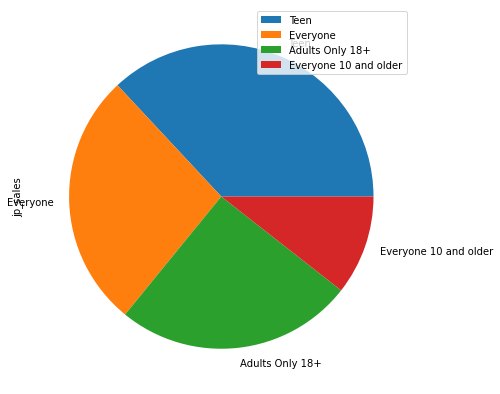

In [43]:
jp_portrat  = portrait(data = actual_period, value='jp_sales')

В Японии наиболее популярными по продажам платформами являются 3DS (48,2% от общего количества продаж в регионе), PS3 (16,6%), PSV (13,2%), PS4 (11,3%), WiiU (7,7%).

Наиболее популярными играми в Японии являются игры в жанрах Role-Playing(51,04 млн. проданных копий за период с 2013 по 2016 годы,т.е. 44,39%), Action (40,49 млн. проданных копий = 35,2%), Misc (9,2 млн. проданных копии = 8%), Fighting (7,65 млн. проданных копии = 6,7%), Shooter (6,61 млн. проданных копии = 5,7%).

Наиболее популярными играми в Японии являются игры для подростков (36,9% от всех проданных копий в регионе за 2013-16гг), наименее популярными в Японии являются игры для категории 10+ (10,6%).

Составив и проанализировав портреты трёх различных пользователей, можем сделаь выводы о схожести предпочтений северо-американского и европейского пользователей в жанрах игр (первые 4 самых популярных жанра у этих пользователей совпадают, самым популярным жанром является Action), у японского пользователя этот жанр тоже относится к популярным (стоит на 2-м месте), однако на первом месте стоит жанр Role-Playing, у северо-американского и европейского пользователей этот жанр стал предпоследним в топ-5.

Что касается используемых платформ, то можно сделать выводы, что у северо-американских, европейских и японских пользователей из топ-5 популярных платформ совпадают 3 (это DS, PS3, Wii), а у северо-американских и европейских пользователей сопадение по всем 5 платформам.

Относительно рейтинга ESRB видим, что и в Северной Америке, и в Европе наибольшей популярностью пользуются игры для взрослых), а вот в Японии наиболее популярны игры для подростков.

## Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу H₀ так: «средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC».
Исходя из нулевой гипотезы H₀ сформулируем альтернативную гипотезу H₁. Это утверждение, которое принимается верным, если отбрасывается H₀, т.е.в нашем случае оно будет звучать так: «средний пользовательский рейтинг платформы XOne не равен среднему пользовательскому рейтингу платформы PC».

Гипотезу будем проверять специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var), так как наши генеральные совокупности не зависят друг от друга. Для корректного применения данного метода и с учётом того, что размеры выборок у нас отличаются, рассчитаем дисперсии рассматриваемых генеральных совокупностей.

In [44]:
variance_xone = np.var(actual_period.query('platform =="XOne" and user_score!=100')['user_score'])
print('Дисперсия пользовательского рейтинга платформы XOne', variance_xone)
variance_pc = np.var(actual_period.query('platform =="PC" and user_score!=100')['user_score'])
print('Дисперсия пользовательского рейтинга платформы PC', variance_pc)

Дисперсия пользовательского рейтинга платформы XOne 3.7566646084458606
Дисперсия пользовательского рейтинга платформы PC 3.9233984375000004


Дисперсии выборок сильно отличаются, таким образом будем указывать equal_var = False при вызове метода scipy.stats.ttest_ind(), в качестве критического уровня статистической значимости зададим alpha=0.01.

In [45]:
xone = actual_period.query('platform =="XOne" and user_score!=100')['user_score'] 
pc = actual_period.query('platform =="PC" and user_score!=100')['user_score']

results = st.ttest_ind( xone, pc, equal_var=False)
alpha = 0.01

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.4973356674916535
Опровергнуть нулевую гипотезу нельзя


Таким образом, у нас нет оснований для того, чтобы опровергнуть нулевую гипотезу о том, что средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC, значит, у нас нет оснований утверждать, что средние пользовательские рейтинги платформ XOne и PC значимо различаются. Следовательно, мы можем предположить, что изначальная гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, верна.
На всякий случай, можем дополнительно убедиться в этом, рассчитав средние пользовательские рейтинги обеих платформ с помощью функции mean в сводной таблице по играм, итак средний пользовательский рейтинг платформы PC отличается от среднего пользовательского рейтинга платформы XOne примерно на 0,15 баллов, оба пользовательских рейтинга равны примерно 6 баллам.

In [46]:
actual_period.query('user_score!=100 and (platform=="PC" or platform=="XOne")').pivot_table(index='platform', values='user_score')

,user_score
platform,
PC,5.618750
XOne,5.761658


Проверим вторую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу H₀ так: «средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports».
Исходя из нулевой гипотезы H₀ сформулируем альтернативную гипотезу H₁. Это утверждение, которое принимается верным, если отбрасывается H₀, т.е.в нашем случае оно будет звучать так: «средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports».

Гипотезу будем проверять специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var), так как наши генеральные совокупности не зависят друг от друга. Для корректного применения данного метода и с учётом того, что размеры выборок у нас отличаются, рассчитаем дисперсии рассматриваемых генеральных совокупностей.

In [47]:
variance_action = np.var(actual_period.query('genre =="Action" and user_score!=100')['user_score'])
print('Дисперсия пользовательского рейтинга жанра Action', variance_action)
variance_sports = np.var(actual_period.query('genre =="Sports" and user_score!=100')['user_score'])
print('Дисперсия пользовательского рейтинга жанра Sports', variance_sports)

Дисперсия пользовательского рейтинга жанра Action 5.238082990397807
Дисперсия пользовательского рейтинга жанра Sports 4.560259280296701


Дисперсии выборок отличаются, таким образом будем указывать equal_var = False при вызове метода scipy.stats.ttest_ind(), в качестве критического уровня статистической значимости зададим alpha=0.01.

In [48]:
action = actual_period.query('genre =="Action" and user_score!=100')['user_score'] 
sports = actual_period.query('genre =="Sports" and user_score!=100')['user_score']

results = st.ttest_ind( action, sports, equal_var=False)
alpha = 0.01

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  3.189480735374219e-10
Принимаем альтернативную гипотезу


Итак, мы можем принять альтернативную гипотезу о том, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу платформы PC, следовательно, изначальная гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, может быть верна.
На всякий случай, можем также дополнительно убедиться в этом, рассчитав средние пользовательские рейтинги обоих жанров с помощью функции mean в сводной таблице по играм, итак средний пользовательский рейтинг жанра Action равен примерно 5,7 балла, а жанра Sports - 4,5 балла.

In [49]:
actual_period.query('user_score!=100 and (genre=="Action" or genre=="Sports")').pivot_table(index='genre', values='user_score')

,user_score
genre,
Action,5.731481
Sports,4.456647


## Общий вывод

В результате проведённого анализа исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах, мы смогли отработать принципы работы с данными. 

В ходе работы мы проанаизировали данные, существенных пропусков и выбросов в данных замечено не было, также получили информацию о том, что средний цикл "жизни" патформы составляет не более 7-8 лет пик приходится на 2-3 года, за этот срок, как правило, появляются новые и исчезают старые платформы. Таким образом, для дальнейшего анализа был выбран период с 2013 по неполный 2016 годы, к потенциально прибыльным платформам к концу периода были отнесены платформы, у которых только недавно начался жизненный цикл, это платформы XOne, PS4. Анализ показал, что на продажи игр относительно платформ оценки критиков и пользователей влияют, однако эта связь эта очень слабая, гораздо больше на продажи игр влияют жанры и рейтинг ESRB.
Так, наиболее популярным жанром является Action (его популярность особенно значима в Северной Америке и Европе, в Японии этот жанр второй по популярности после Role-Playing, при этом в Европе Role-Playing не входит даже в топ-5 наиболее популярных жанров), наименее популярными жанрами являются Strategy и Puzzle.
Что касается рейтинга ESRB, то и в Северной Америке, и в Европе наибольшей популярностью пользуются игры для взрослых в то время, как в Японии наиболее популярны игры для взрослых.

Также в рамках данного анализа, мы проверили две гипотезы о том, что средние пользовательские рейтинги платформ XOne и PC одинаковы, и о том, что средние пользовательские рейтинги жанров Action и Sports разные. Обе гипотезы могут быть верны. При этом средний пользовательский рейтинг платформ XOne и PC отличается равен примерно 6 баллам,а средний пользовательский рейтинг жанра Action оказался выше (5,7 балла) среднего пользовательского рейтинга Sports (4,5 балла).

Основной задачей исследования было выявление определяющих успешность игры закономерностей, к таким закономерностям можно отнести принадлежность игры к набирающей "силу" платформе (например, XOne и PS4), наиболее популярному жанру (Action во всех регионах, Shooter - для Северной Америки и Европы, Role-Playing - Японии), принадлежность игры к определённому рейтингу ESRB (например, рейтинг Everyone актуален для всех регионов), эти критерии позволят сделать ставку на потенциально популярный продукт (например, игры в жанре Action для категории Everyone на платформах XOne/ PS4) и спланировать соответствующие рекламные кампании для таких игр. Поставленную задачу можно считать выполненной в данном контексте.